# S03 T02: Visualització gràfica de Múltiples variables
## Nivell 1
### Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
tips = pd.read_csv('tips.csv', sep = ',', encoding = 'utf-8')

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Vista previa del gráfico (5 primeras líneas)

In [3]:
tips.shape

(244, 7)

Dimensión del gráfico: filas por columnas

In [4]:
tips.ndim

2

Número de ejes del Data

In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Nombre de las columnas

In [6]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Tipo de datos de cada columna

In [7]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


Se agraga una columna que indica el porcentaje de la propina respecto a la cuenta

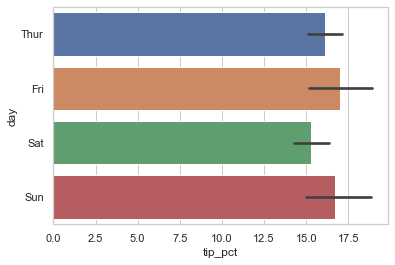

In [49]:
sns.barplot(x='tip_pct', y='day', data=tips,order=['Thur','Fri', 'Sat', 'Sun'], orient="h")
plt.show()

Se grafica el porcentaje de propinas total en referencia al total de las cuentas por cada día (de jueves a domingo)

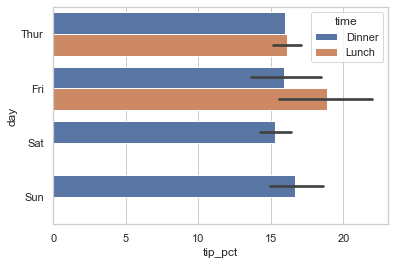

In [50]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, order=['Thur','Fri', 'Sat', 'Sun'], orient='h')
plt.show()
sns.set(style="darkgrid")

Lo mismo que el gráfico anterior pero diferenciando almuerzo de cena los días jueves y viernes

In [10]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.079754
std,8.902412,1.383638,0.951100,6.107020
min,3.070000,1.000000,1.000000,3.560000
25%,13.347500,2.000000,2.000000,12.910000
50%,17.795000,2.900000,2.000000,15.475000
75%,24.127500,3.562500,3.000000,19.147500
max,50.810000,10.000000,6.000000,71.030000


Síntesis estadística del Data

In [11]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,16.080
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,6.107
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.560
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,12.910
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,15.475
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,19.148


Síntesis estadística del Data más completa

In [16]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

Se observa que el data no tiene valores nulos

In [13]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

Síntesis estadística de la columna "tip" (pidiéndo que rroje tres decimales)

In [18]:
round((tips['tip']).median(), 3)

2.9

Se obtiene el valor medio de las propinas

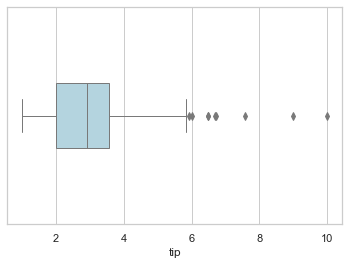

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

Se grafica la distribución de los diferentes montos de la propina en un Box Plot

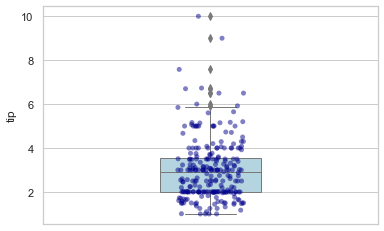

In [34]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5, jitter=0.1)

Se suma a la gráfica un jitter (metedo que ubica todas las muestras, pero produce un "temblor" en las mismas para poder verlar mejor en gráfico. La gradación estandar es del jitter es de 0,1)

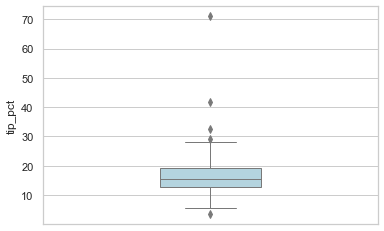

In [22]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);


Se grafica la distribución de los diferentes porcentajes de la propina en un Box Plot

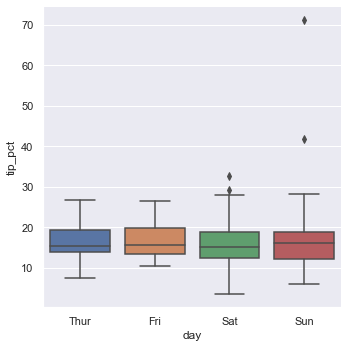

In [51]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips, order=['Thur','Fri', 'Sat', 'Sun']);

Lo mismo que lo anterior pero por día

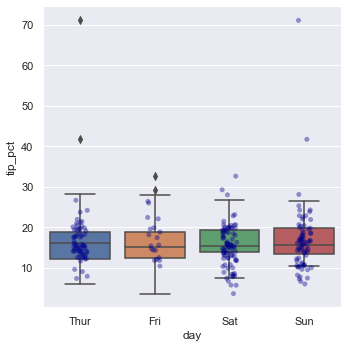

In [54]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips, order=['Thur','Fri', 'Sat', 'Sun'],orient='v', color='darkblue', alpha= 0.4);

Se suma a la gráfica un jitter

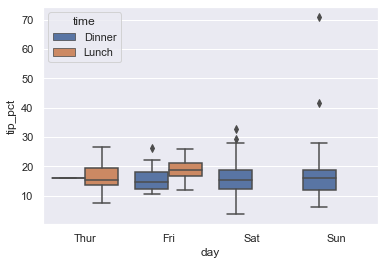

In [55]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips, order=['Thur','Fri', 'Sat', 'Sun']);

Lo que se viene analizando pero distinguiendo almuerzo de cena jueves y viernes

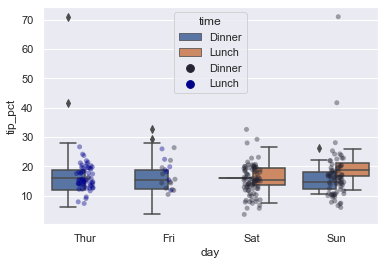

In [57]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips,order=['Thur','Fri', 'Sat', 'Sun'], orient='v', color='darkblue', alpha= 0.4);

Se suma a la gráfica un jitter

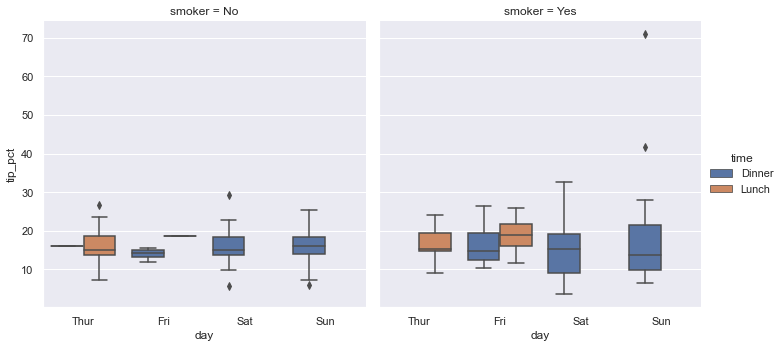

In [58]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips,order=['Thur','Fri', 'Sat', 'Sun']);

Suma al análisis la división entre fumadores y no fumadores